# Visualising the US Treasury Yield Curve (2D & 3D)

In [1]:
# import packages

import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time

### Accessing FredPy & Downloading Data

In [2]:
fp.api_key = FREDPY_API_KEY # substitute your FredPy API key here

# start and end dates
#start_date = '1955-01-01'
start_date = '2008-01-01'
end_date = '2025-01-01'

In [3]:
# download data into Fred objects
y1m= fp.series('DTB4WK')
y3m= fp.series('DTB3')
y6m= fp.series('DTB6')
y1 = fp.series('DGS1')
y5 = fp.series('DGS5')
y10= fp.series('DGS10')
y20= fp.series('DGS20')
y30= fp.series('DGS30')

# label series names
y1m.data.name = '1 M'
y3m.data.name = '3 M'
y6m.data.name = '6 M'
y1.data.name = '1 Y'
y5.data.name = '5 Y'
y10.data.name = '10 Y'
y20.data.name = '20 Y'
y30.data.name = '30 Y'

In [4]:
yields = pd.concat([y1m.data,y3m.data,y6m.data,y1.data,y5.data,y10.data,y20.data,y30.data],axis=1)
yields = yields.loc[start_date:end_date]
yields = yields.dropna(thresh=1)
N = len(yields.index)
print('Date range: '+yields.index[0].strftime('%b %d, %Y')+' to '+yields.index[-1].strftime('%b %d, %Y'))

Date range: Jan 02, 2008 to Dec 28, 2022


In [5]:
yields.describe()

,1 M,3 M,6 M,1 Y,5 Y,10 Y,20 Y,30 Y
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.574649,0.638067,0.740992,0.864628,1.724279,2.416278,2.953767,3.130619
std,0.847816,0.900287,0.949815,0.991705,0.817919,0.813564,0.892497,0.841838
min,-0.040000,-0.050000,0.020000,0.040000,0.190000,0.520000,0.870000,0.990000
25%,0.040000,0.050000,0.100000,0.150000,1.150000,1.830000,2.330000,2.620000
50%,0.110000,0.140000,0.200000,0.370000,1.650000,2.370000,2.800000,3.040000
75%,0.950000,1.050000,1.285000,1.505000,2.300000,2.955000,3.590000,3.710000
max,4.010000,4.350000,4.620000,4.800000,4.450000,4.270000,4.860000,4.850000


In [6]:
yields.head()

,1 M,3 M,6 M,1 Y,5 Y,10 Y,20 Y,30 Y
date,,,,,,,,
2008-01-02,3.02,3.18,3.21,3.17,3.28,3.91,4.39,4.35
2008-01-03,3.13,3.16,3.18,3.13,3.26,3.91,4.41,4.37
2008-01-04,3.16,3.12,3.12,3.06,3.18,3.88,4.40,4.36
2008-01-07,3.21,3.19,3.18,3.11,3.16,3.86,4.37,4.34
2008-01-08,3.25,3.17,3.16,3.09,3.16,3.86,4.39,4.35


### Visualising US Treasury Yield Curve in 2-Dimensional Chart

Text(0.5, 1.0, 'United States Term Structure of Interest Rate 1955-Present')

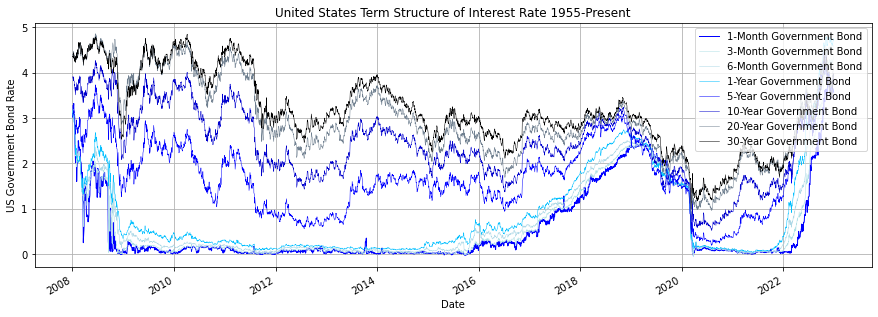

In [7]:
# 2D Visualization

# import seaborn as sns
# sns.set(style='dark', palette='viridis', font='sans-serif')


%matplotlib inline
yields['1 M'].plot(figsize=(15,5), lw=1, color="blue", label='1-Month Government Bond')
yields['3 M'].plot( lw=0.5, color="powderblue",label='3-Month Government Bond')
yields['6 M'].plot( lw=0.5, color="lightblue",label='6-Month Government Bond')
yields['1 Y'].plot( lw=0.5, color="deepskyblue",label='1-Year Government Bond')
yields['5 Y'].plot( lw=0.5, color="blue",label='5-Year Government Bond')
yields['10 Y'].plot( lw=0.5, color="mediumblue",label='10-Year Government Bond')
yields['20 Y'].plot( lw=0.5, color="slategrey", label='20-Year Government Bond')
yields['30 Y'].plot( lw=0.5, color="black", grid=True,label='30-Year Government Bond')
plt.legend()
plt.xlabel("Date")
plt.ylabel("US Government Bond Rate")
plt.title("United States Term Structure of Interest Rate 1955-Present")

Date range: Jan 02, 2008 to Dec 28, 2022


Text(0.5, 1.0, 'United States Term Structure of Interest Rate 2008-Present')

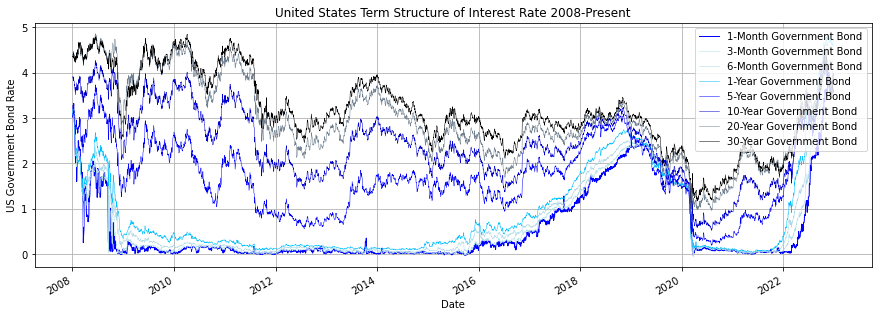

In [8]:
start_date = '2008-01-01'
yields = pd.concat([y1m.data,y3m.data,y6m.data,y1.data,y5.data,y10.data,y20.data,y30.data],axis=1)
yields = yields.loc[start_date:end_date]
yields = yields.dropna(thresh=1)
N = len(yields.index)
print('Date range: '+yields.index[0].strftime('%b %d, %Y')+' to '+yields.index[-1].strftime('%b %d, %Y'))

import seaborn as sns
# Set theme with Seaborn
#sns.set(style='darkgrid', palette='deep', font='sans-serif')

%matplotlib inline
yields['1 M'].plot(figsize=(15,5), lw=1, color="blue", label='1-Month Government Bond')
yields['3 M'].plot( lw=0.5, color="powderblue",label='3-Month Government Bond')
yields['6 M'].plot( lw=0.5, color="lightblue",label='6-Month Government Bond')
yields['1 Y'].plot( lw=0.5, color="deepskyblue",label='1-Year Government Bond')
yields['5 Y'].plot( lw=0.5, color="blue",label='5-Year Government Bond')
yields['10 Y'].plot( lw=0.5, color="mediumblue",label='10-Year Government Bond')
yields['20 Y'].plot( lw=0.5, color="slategrey", label='20-Year Government Bond')
yields['30 Y'].plot( lw=0.5, color="black", grid=True,label='30-Year Government Bond')
plt.legend()
plt.xlabel("Date")
plt.ylabel("US Government Bond Rate")
plt.title("United States Term Structure of Interest Rate 2008-Present")

### Visualising US Treasury Yield Curve in 3-Dimensional Chart

In [9]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# Numpy.recarray
yn = yields.to_records()
type(yn)
yn

print(yn.dtype.names)


('date', '1 M', '3 M', '6 M', '1 Y', '5 Y', '10 Y', '20 Y', '30 Y')


In [10]:
# Maturity
header = []
for name in yn.dtype.names[1:]:
    maturity = float(name.split(" ")[0])
    if name.split(" ")[1] == 'Mo':
        maturity = maturity / 12
    header.append(maturity)
print (header)

[1.0, 3.0, 6.0, 1.0, 5.0, 10.0, 20.0, 30.0]


In [11]:
# We create three empty lists 
x_data = []; y_data = []; z_data = []
for dt in yn.date:
    dt_num = dates.date2num(dt)
    x_data.append([dt_num for i in range(len(yn.dtype.names)-1)])
# print ('x_data: ', x_data[1:5])

In [12]:
for row in yn:
    y_data.append(header)
    z_data.append(list(row.tolist()[1:]))
# print ('y_data: ', y_data[1:5])
# print ('z_data: ', z_data[1:5])

In [13]:
x = np.array(x_data, dtype='f'); y = np.array(y_data, dtype='f'); z = np.array(z_data, dtype='f')
# x ==> Dates
# y ==> Maturities
# z ==> Yields
# print ('x:', x) 
# print ('y: ', y)
# print ('z: ', z)

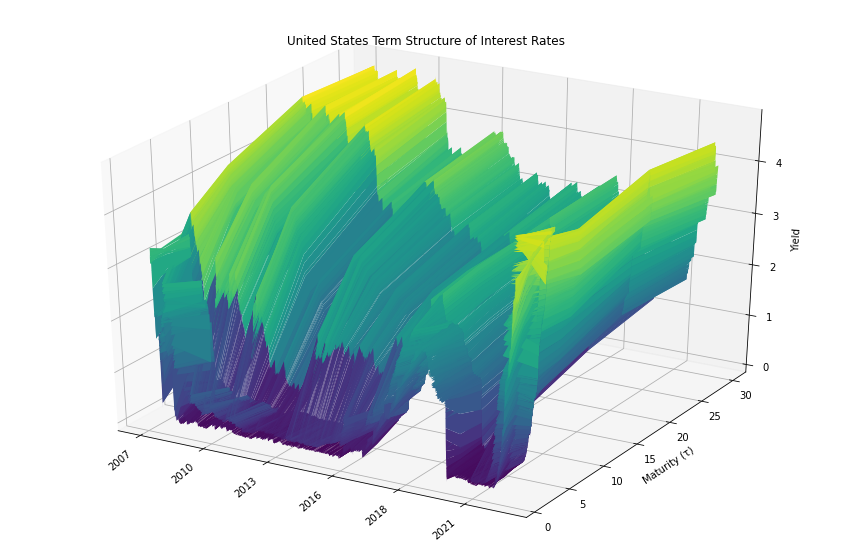

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap='viridis', vmin=np.nanmin(z), vmax=np.nanmax(z))
ax.set_title('United States Term Structure of Interest Rates')
ax.set_ylabel('Maturity (\u03C4)')
ax.set_zlabel('Yield')

def format_date(x, pos=None):
     return dates.num2date(x).strftime('%Y')
ax.w_xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
for tl in ax.w_xaxis.get_ticklabels():
    tl.set_ha('right')
    tl.set_rotation(40)
plt.show()



In [15]:
plt.savefig('my_pgf_plot.jpeg')

<Figure size 432x288 with 0 Axes>